### Load and Inspect the Dataset

In [22]:
import pandas as pd
import plotly.express as px #for histogram

# Load the dataset
file_path = '../data/reData.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows
data.head()



,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Voice_Calls,Mobile_Data_Internet,SMS_Text_Messaging,Data_Exhaustion,Other_Networks,Poor_Network_Quality_Coverage,Insufficient_Data_Allowance,Unsatisfactory_Customer_Service,High_Costs_Pricing,Monthly_Data_Usage
0,Female,College of Humanities and Social Sciences,No,100,On-campus,No,Occasionally,4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8.68
1,Male,College of Humanities and Social Sciences,Yes,100,Off-campus,No,Several times a week,5,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,1.74
2,Male,College of Art and Built Environment,No,200,Off-campus,No,Never,1,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,9.25
3,Female,College of Humanities and Social Sciences,No,400,On-campus,Yes,Daily,4,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,3.67
4,Female,College of Humanities and Social Sciences,Yes,400,On-campus,Yes,Occasionally,5,No,No,Yes,Yes,Yes,No,No,No,Yes,0.50


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           768 non-null    object 
 1   College                          768 non-null    object 
 2   Churn                            768 non-null    object 
 3   Level                            768 non-null    int64  
 4   Residence                        768 non-null    object 
 5   SIM_Usage                        768 non-null    object 
 6   Usage_Freq                       768 non-null    object 
 7   Network_Strength                 768 non-null    int64  
 8   Voice_Calls                      768 non-null    object 
 9   Mobile_Data_Internet             768 non-null    object 
 10  SMS_Text_Messaging               768 non-null    object 
 11  Data_Exhaustion                  768 non-null    object 
 12  Other_Networks        

In [16]:

# Summary statistics
data.describe()

,Level,Network_Strength,Monthly_Data_Usage
count,768.000000,768.000000,768.000000
mean,263.020833,2.994792,5.075768
std,130.037562,1.389089,2.825475
min,100.000000,1.000000,0.500000
25%,200.000000,2.000000,2.610000
50%,300.000000,3.000000,5.025000
75%,400.000000,4.000000,7.537500
max,600.000000,5.000000,10.450000


### EDA

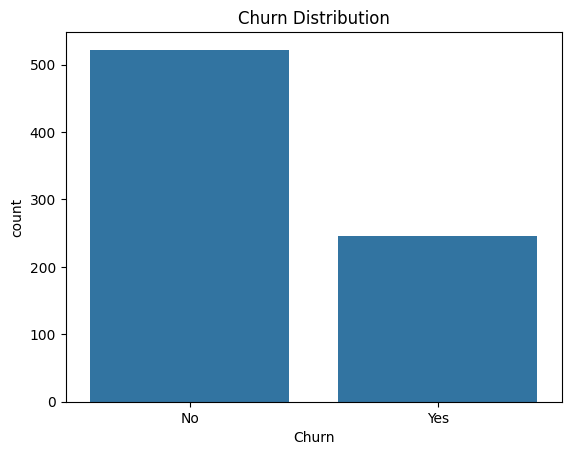

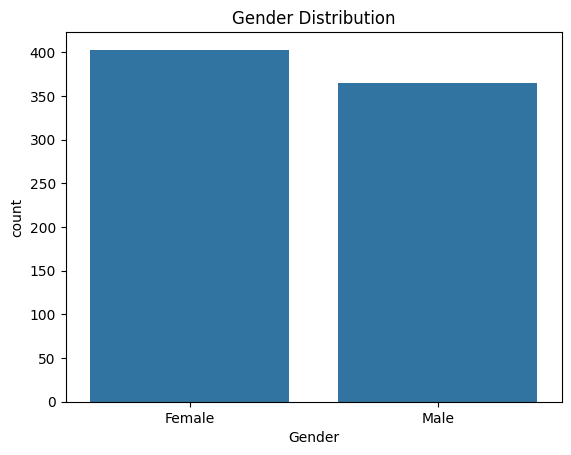

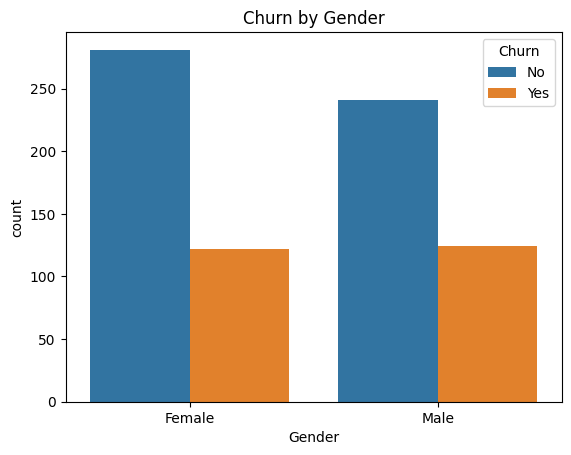

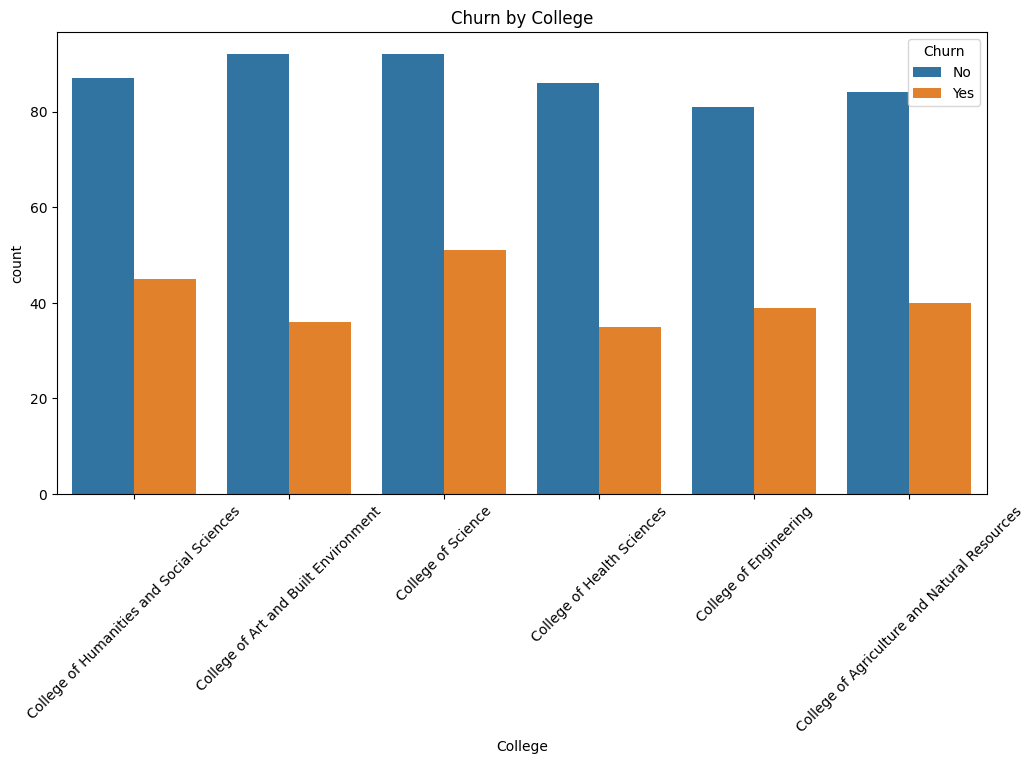

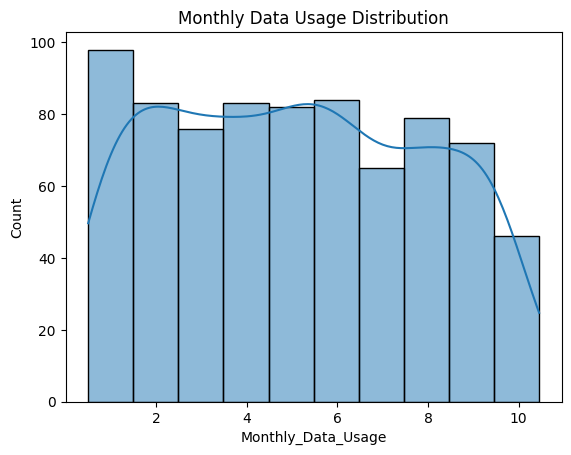

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Churn
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Gender distribution
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Churn by Gender
sns.countplot(x='Gender', hue='Churn', data=data)
plt.title('Churn by Gender')
plt.show()

# Churn by College
plt.figure(figsize=(12, 6))
sns.countplot(x='College', hue='Churn', data=data)
plt.title('Churn by College')
plt.xticks(rotation=45)
plt.show()

# Monthly Data Usage distribution
sns.histplot(data['Monthly_Data_Usage'], bins=10, kde=True)
plt.title('Monthly Data Usage Distribution')
plt.show()


### Data Prepocessing

In [20]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])
# Get all the categorical columns
category_feature = data.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in category_feature:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])

    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])

        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


### MOdel Generation

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9805194805194806
Confusion Matrix:
 [[111   0]
 [  3  40]]
Classification Report:
               precision    recall  f1-score   support

          No       0.97      1.00      0.99       111
         Yes       1.00      0.93      0.96        43

    accuracy                           0.98       154
   macro avg       0.99      0.97      0.98       154
weighted avg       0.98      0.98      0.98       154

